<a href="https://colab.research.google.com/github/pushpendra910/ML-in-Friction-Stir-Welding/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/M tech thesis"
!git clone https://github.com/pushpendra910/ML-in-Friction-Stir-Welding.git

/content/drive/MyDrive/Colab Notebooks/M tech thesis
fatal: destination path 'ML-in-Friction-Stir-Welding' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
data.sample()

,Unnamed: 0,image_name,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number
65,65,Specimen 21 WM+WM2@100X.bmp,12.798147,61.980975,38.019025,10.490284,1.630262,9.315355


In [ ]:
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")

In [ ]:
data.shape,parameters.shape

((108, 8), (108, 5))

In [ ]:
data=pd.concat([data,parameters],axis=1)

In [ ]:
data.tail()

,Unnamed: 0,image_name,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Run order,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
103,103,Specimen 9 WM+WM2@500X.bmp,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,26,104,450,15,170
104,104,Specimen 9 WM+WM3@1000X.bmp,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,27,164,710,15,170
105,105,Specimen 9 WM+WM3@100X.bmp,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,27,164,710,15,157
106,106,Specimen 9 WM+WM3@200X.bmp,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,27,164,710,15,170
107,107,Specimen 9 WM+WM3@500X.bmp,14.739102,80.645526,19.354474,2.416246,4.166764,10.351501,27,164,710,15,152


In [ ]:
data.columns

Index(['Unnamed: 0', 'image_name', 'Grain_size_in_pixels', 'ferrite_%',
       'pearlite_%', 'Grain size in micron', 'phase_ratio',
       'Grain_size_number', 'Run order', 'Welding Speed (mm/min)',
       'Tool Rotational Speed (mm/min)', 'Tool Shoulder Diameter (mm)',
       'Vickers Hardness'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0','image_name','Run order'],axis=1,inplace=True)

<Axes: >

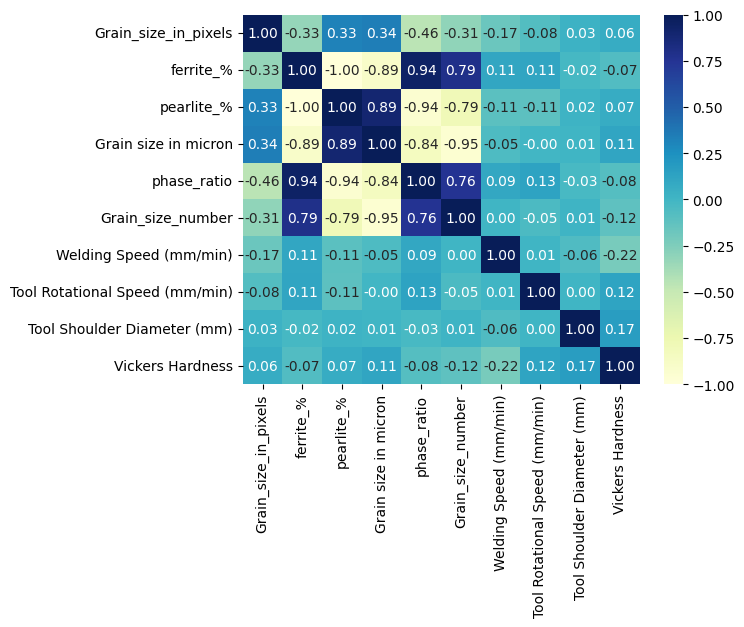

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt=".2f")

In [ ]:
X=data.drop('Vickers Hardness',axis=1)
y=data['Vickers Hardness']

In [ ]:
numeric_data = data.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [ ]:
# numeric_data['Vickers Hardness']=y

<Axes: >

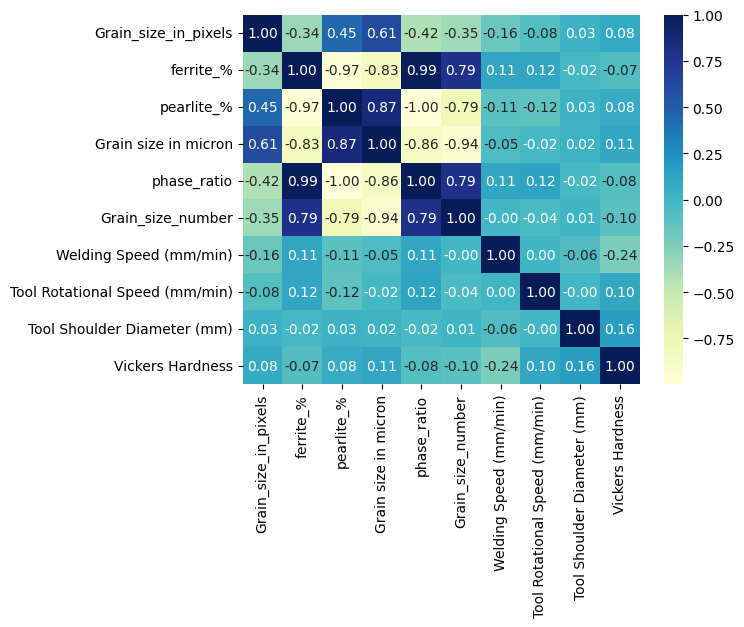

In [ ]:
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True,fmt=".2f")

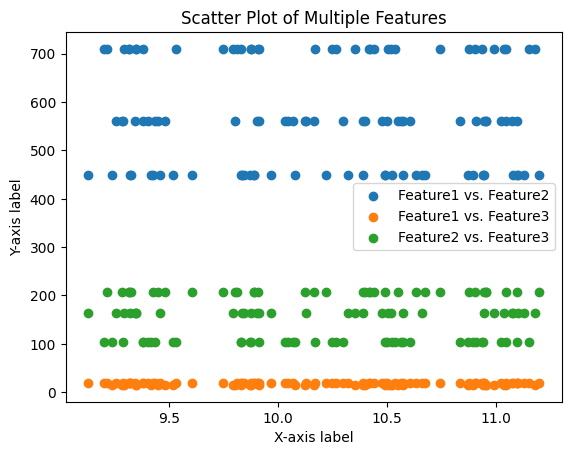

In [ ]:
plt.scatter(data['Grain_size_number'], data['Tool Rotational Speed (mm/min)'], label='Feature1 vs. Feature2')
plt.scatter(data['Grain_size_number'], data['Tool Shoulder Diameter (mm)'], label='Feature1 vs. Feature3')
plt.scatter(data['Grain_size_number'], data['Welding Speed (mm/min)'], label='Feature2 vs. Feature3')

# set plot title and axis labels
plt.title('Scatter Plot of Multiple Features')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# show legend and plot
plt.legend()
plt.show()

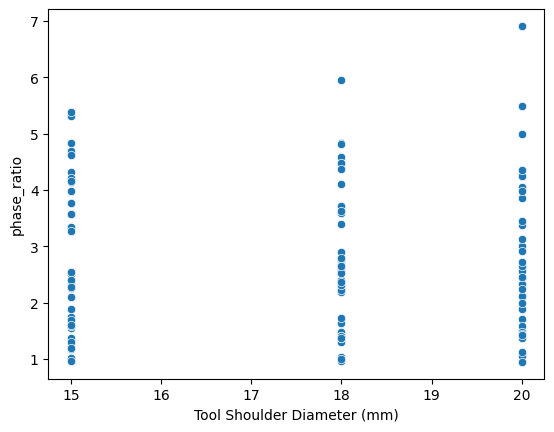

In [ ]:
sns.scatterplot(x=data["Tool Shoulder Diameter (mm)"], y=data["phase_ratio"]);

In [ ]:
data.isna().sum()

Unnamed: 0                        0
image_name                        0
Grain_size_in_pixels              1
ferrite_%                         0
pearlite_%                        0
Grain size in micron              1
phase_ratio                       0
Grain_size_number                 0
Run order                         0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
data.Grain_size_number.fillna(np.mean(data['Grain size in micron']),inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transform data
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=df.columns)

ValueError: could not convert string to float: 'Specimen 1 WM+WM1@1000X.bmp'

In [ ]:
x=data[['Tool Rotational Speed (mm/min)','Welding Speed (mm/min)','Tool Shoulder Diameter (mm)']]

In [ ]:
data.columns

Index(['Unnamed: 0', 'image_name', 'Grain_size_in_pixels', 'ferrite_%',
       'pearlite_%', 'Grain size in micron', 'phase_ratio',
       'Grain_size_number', 'Run order', 'Welding Speed (mm/min)',
       'Tool Rotational Speed (mm/min)', 'Tool Shoulder Diameter (mm)',
       'Vickers Hardness'],
      dtype='object')

In [ ]:
y=data['Grain_size_number']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((86, 3), (22, 3), (86,), (22,))

In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE')

In [ ]:
model.fit(x_train,y_train)

Learning rate set to 0.027786
0:	learn: 0.6114293	total: 146ms	remaining: 2m 25s
1:	learn: 0.6107901	total: 147ms	remaining: 1m 13s
2:	learn: 0.6102571	total: 149ms	remaining: 49.4s
3:	learn: 0.6098957	total: 149ms	remaining: 37.2s
4:	learn: 0.6094327	total: 151ms	remaining: 30s
5:	learn: 0.6092833	total: 151ms	remaining: 25.1s
6:	learn: 0.6088143	total: 153ms	remaining: 21.7s
7:	learn: 0.6082920	total: 154ms	remaining: 19.1s
8:	learn: 0.6079785	total: 155ms	remaining: 17s
9:	learn: 0.6075163	total: 156ms	remaining: 15.4s
10:	learn: 0.6073317	total: 156ms	remaining: 14.1s
11:	learn: 0.6071380	total: 157ms	remaining: 12.9s
12:	learn: 0.6068755	total: 158ms	remaining: 12s
13:	learn: 0.6063140	total: 158ms	remaining: 11.1s
14:	learn: 0.6058969	total: 159ms	remaining: 10.4s
15:	learn: 0.6058041	total: 159ms	remaining: 9.79s
16:	learn: 0.6057064	total: 160ms	remaining: 9.23s
17:	learn: 0.6055161	total: 160ms	remaining: 8.73s
18:	learn: 0.6051881	total: 160ms	remaining: 8.28s
19:	learn: 0.60

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

-0.34401601707074847

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model: {type(model).__name__}, R2 score: {r2:.2f}, RMSE: {rmse:.2f}")


Model: LinearRegression, R2 score: -0.13, RMSE: 0.69
Model: DecisionTreeRegressor, R2 score: -0.34, RMSE: 0.75
Model: RandomForestRegressor, R2 score: -0.36, RMSE: 0.76
Model: SVR, R2 score: -0.15, RMSE: 0.70


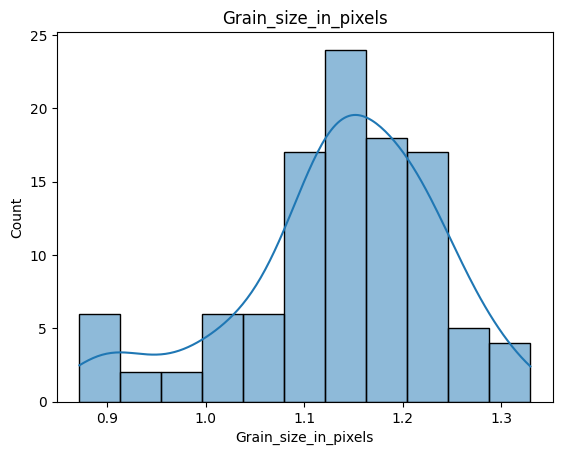

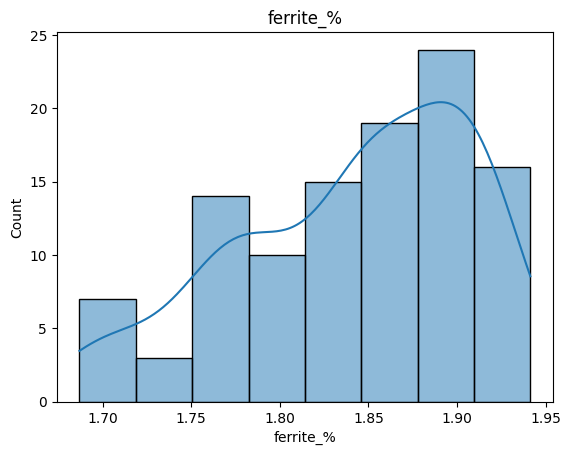

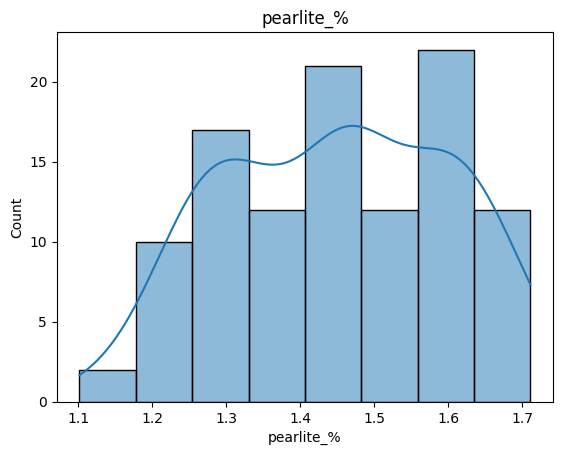

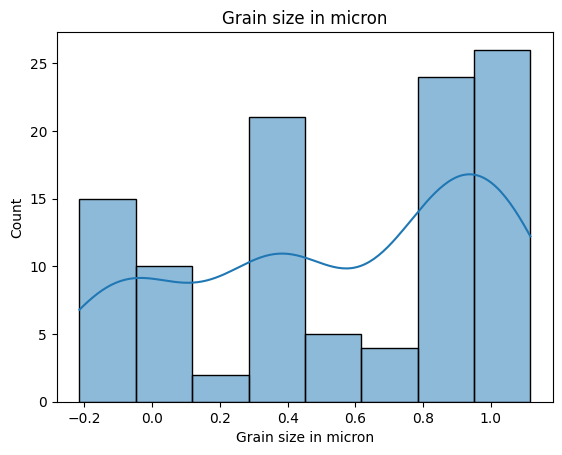

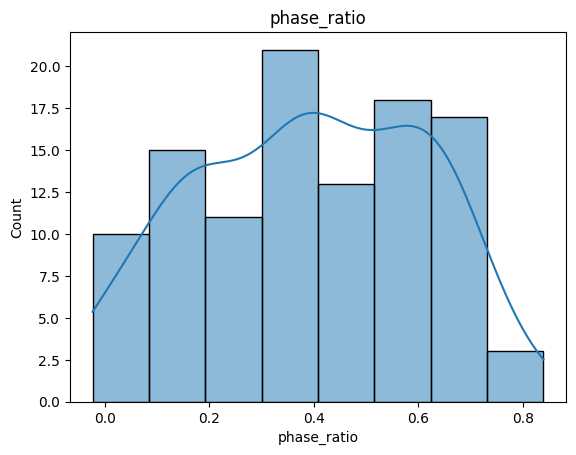

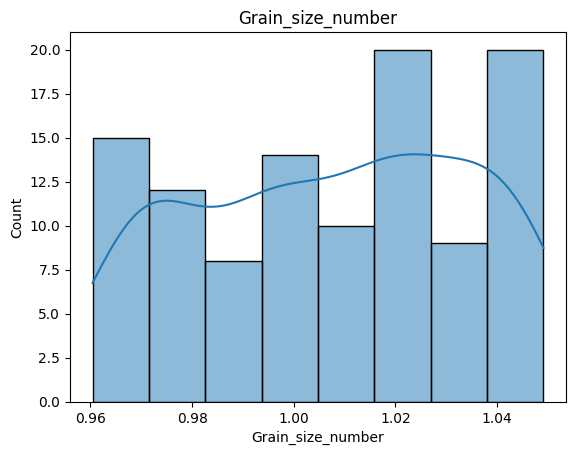

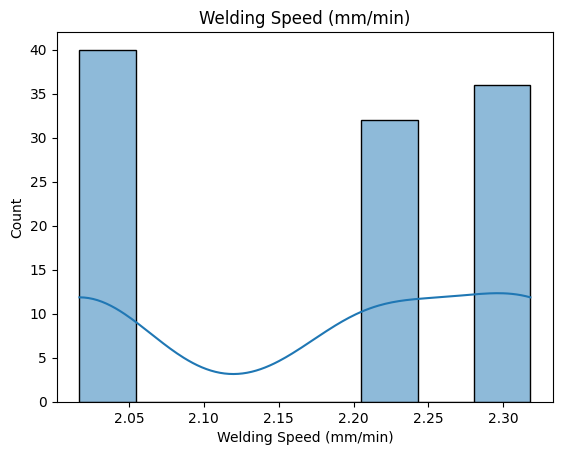

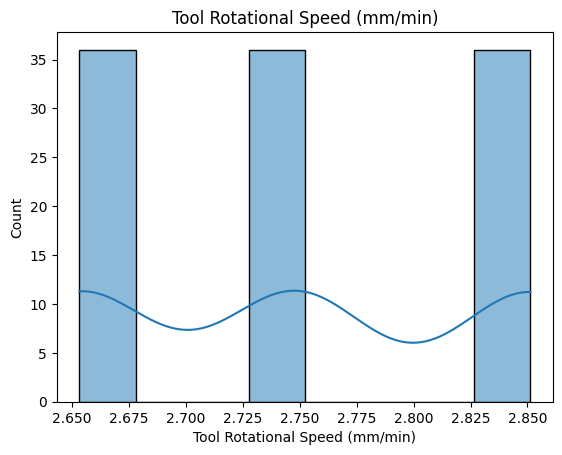

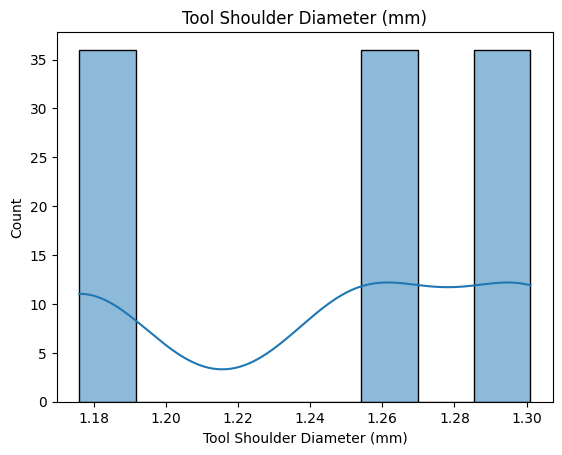

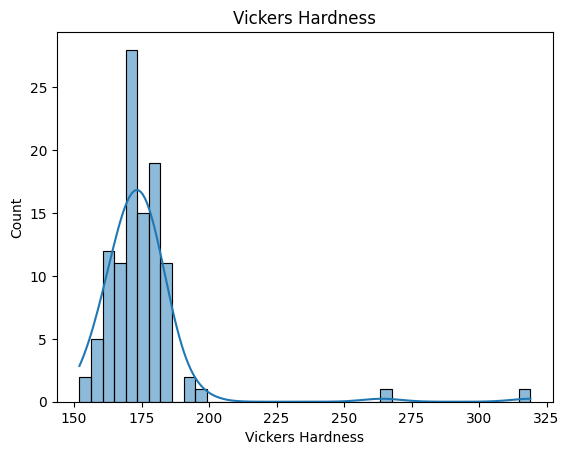

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data frame
df = numeric_data.copy()

# Get a list of all the columns
columns = list(df.columns)

# Loop through each column and create a visualization
for column in columns:
    # If the column is categorical, create a bar plot
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df)
    # If the column is numerical, create a histogram
    else:
        sns.histplot(data=df, x=column, kde=True)
    # Set the title of the plot
    plt.title(column)
    # Show the plot
    plt.show()


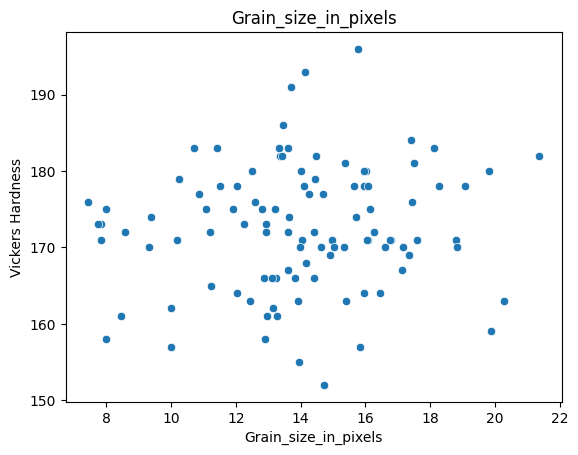

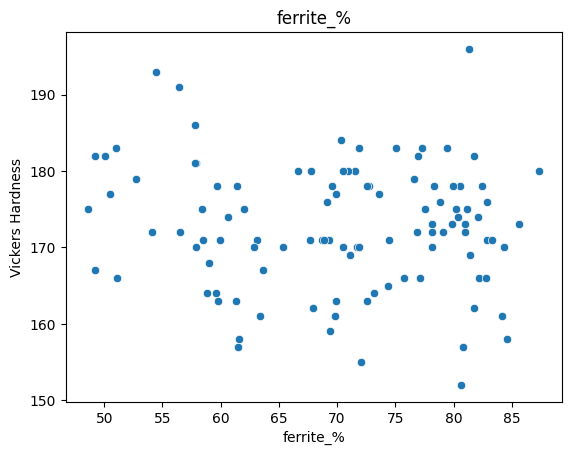

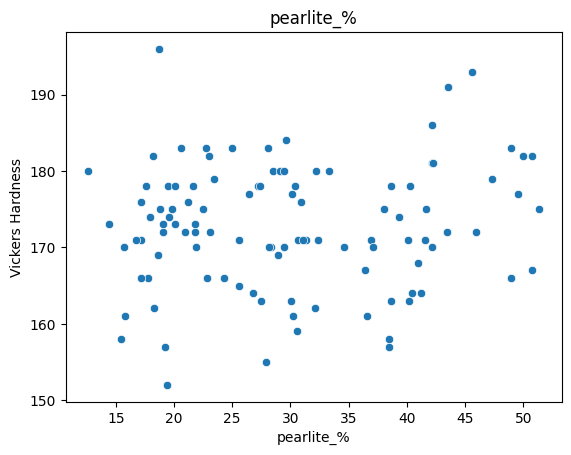

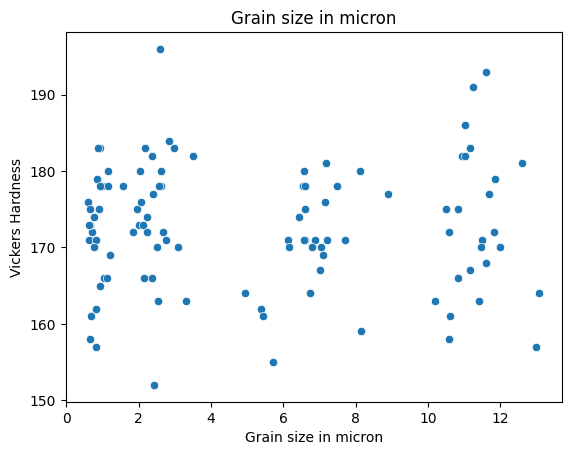

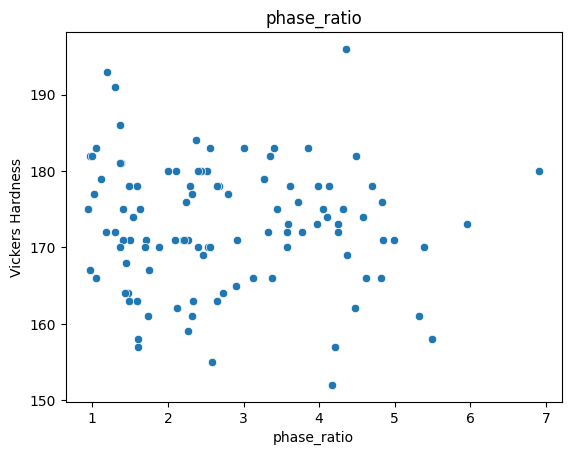

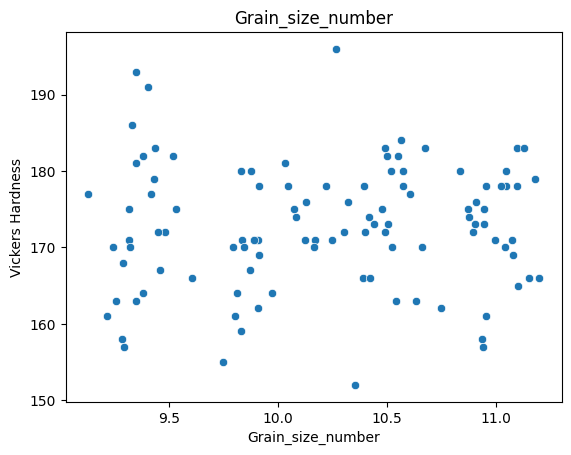

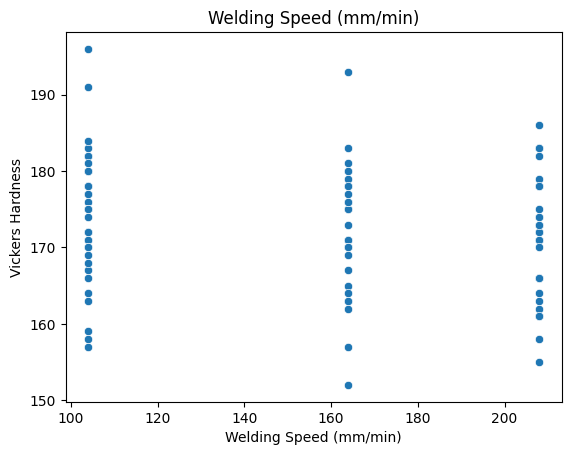

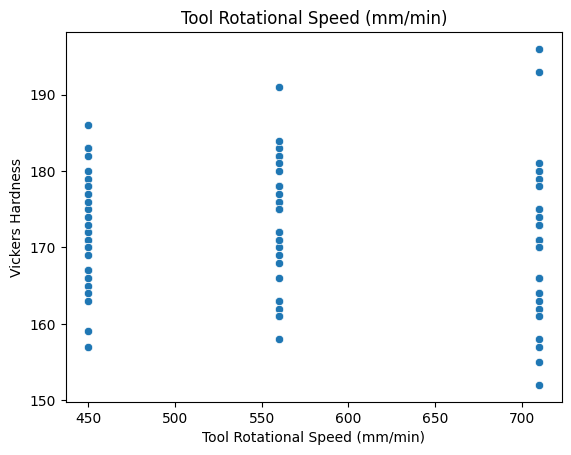

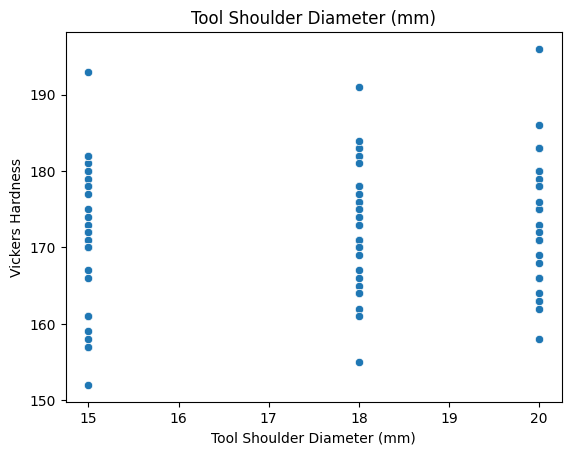

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data frame
df = data.copy()
df=df[df['Vickers Hardness']<225]
# Get a list of all the columns except for the target column
columns = [col for col in df.columns if col != 'Vickers Hardness']

# Loop through each column and create a visualization
for column in columns:
    # If the column is categorical, create a box plot
    if df[column].dtype == 'object':
        sns.boxplot(x=column, y='Vickers Hardness', data=df)
    # If the column is numerical, create a scatter plot
    else:
        sns.scatterplot(x=column, y='Vickers Hardness', data=df)
    # Set the title of the plot
    plt.title(column)
    # Show the plot
    plt.show()


<Axes: >

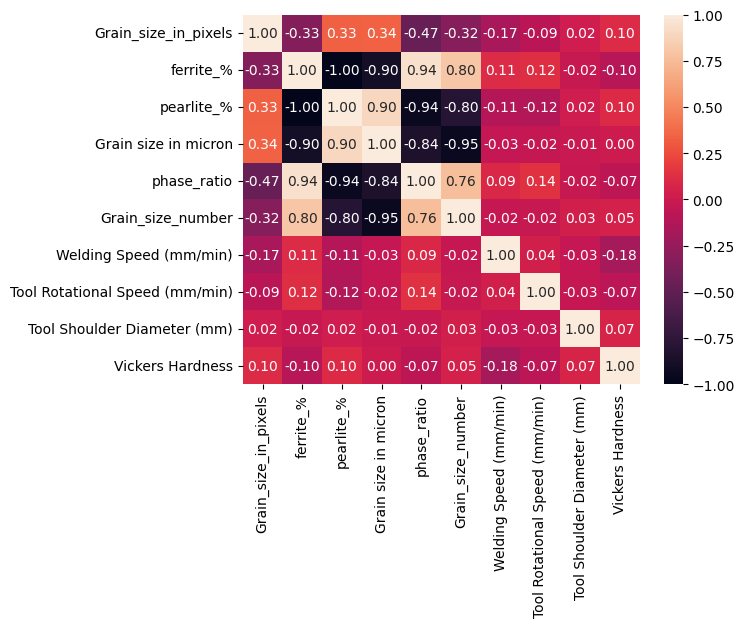

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [ ]:
data.columns

Index(['Unnamed: 0', 'image_name', 'Grain_size_in_pixels', 'ferrite_%',
       'pearlite_%', 'Grain size in micron', 'phase_ratio',
       'Grain_size_number', 'Run order', 'Welding Speed (mm/min)',
       'Tool Rotational Speed (mm/min)', 'Tool Shoulder Diameter (mm)',
       'Vickers Hardness'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'image_name','Run order'],axis=1, inplace=True)

In [ ]:
data.isnull().sum()

Grain_size_in_pixels              1
ferrite_%                         0
pearlite_%                        0
Grain size in micron              1
phase_ratio                       0
Grain_size_number                 0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
data.describe()


,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
count,107.000000,108.000000,108.000000,107.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,14.032687,70.134280,29.865720,5.372577,2.773047,10.194910,156.444444,573.333333,17.666667,174.861111
std,2.983915,10.196109,10.196109,4.085340,1.330211,0.622969,44.040197,107.059246,2.064384,18.395173
min,7.445130,48.634621,12.639929,0.610257,0.946837,9.128820,104.000000,450.000000,15.000000,152.000000
25%,12.505539,61.482860,20.854017,1.897327,1.596252,9.710307,104.000000,450.000000,15.000000,167.750000
50%,14.027570,71.304886,28.695114,4.939554,2.485135,10.233710,164.000000,560.000000,18.000000,172.500000
75%,15.998615,79.145983,38.517140,8.522724,3.795503,10.690840,208.000000,710.000000,20.000000,178.000000
max,21.372756,87.360071,51.365379,13.076468,6.911437,11.198426,208.000000,710.000000,20.000000,319.000000


In [ ]:
data.isnull().sum()

Grain_size_in_pixels              1
ferrite_%                         0
pearlite_%                        0
Grain size in micron              1
phase_ratio                       0
Grain_size_number                 0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
avg_p = data["Grain_size_in_pixels"].mean()

# Fill the null value with the average
data["Grain_size_in_pixels"].fillna(avg_p, inplace=True)


In [ ]:
data.isnull().sum()

Grain_size_in_pixels              0
ferrite_%                         0
pearlite_%                        0
Grain size in micron              1
phase_ratio                       0
Grain_size_number                 0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
data.describe()

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
count,108.000000,108.000000,108.000000,107.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,14.032687,70.134280,29.865720,5.372577,2.773047,10.194910,156.444444,573.333333,17.666667,174.861111
std,2.969939,10.196109,10.196109,4.085340,1.330211,0.622969,44.040197,107.059246,2.064384,18.395173
min,7.445130,48.634621,12.639929,0.610257,0.946837,9.128820,104.000000,450.000000,15.000000,152.000000
25%,12.515039,61.482860,20.854017,1.897327,1.596252,9.710307,104.000000,450.000000,15.000000,167.750000
50%,14.030128,71.304886,28.695114,4.939554,2.485135,10.233710,164.000000,560.000000,18.000000,172.500000
75%,15.984460,79.145983,38.517140,8.522724,3.795503,10.690840,208.000000,710.000000,20.000000,178.000000
max,21.372756,87.360071,51.365379,13.076468,6.911437,11.198426,208.000000,710.000000,20.000000,319.000000


In [ ]:

avg_m = data["Grain size in micron"].mean()

# Fill the null value with the average
data["Grain size in micron"].fillna(avg_m, inplace=True)


In [ ]:
data.isnull().sum()

Grain_size_in_pixels              0
ferrite_%                         0
pearlite_%                        0
Grain size in micron              0
phase_ratio                       0
Grain_size_number                 0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
data.describe()

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,14.032687,70.134280,29.865720,5.372577,2.773047,10.194910,156.444444,573.333333,17.666667,174.861111
std,2.969939,10.196109,10.196109,4.066204,1.330211,0.622969,44.040197,107.059246,2.064384,18.395173
min,7.445130,48.634621,12.639929,0.610257,0.946837,9.128820,104.000000,450.000000,15.000000,152.000000
25%,12.515039,61.482860,20.854017,1.926432,1.596252,9.710307,104.000000,450.000000,15.000000,167.750000
50%,14.030128,71.304886,28.695114,5.156066,2.485135,10.233710,164.000000,560.000000,18.000000,172.500000
75%,15.984460,79.145983,38.517140,8.334386,3.795503,10.690840,208.000000,710.000000,20.000000,178.000000
max,21.372756,87.360071,51.365379,13.076468,6.911437,11.198426,208.000000,710.000000,20.000000,319.000000


In [ ]:
data

,Unnamed: 0,image_name,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number
0,0,Specimen 1 WM+WM1@1000X.bmp,7.83,82.88,17.12,0.64,4.84,10.99
1,1,Specimen 1 WM+WM1@100X.bmp,15.37,57.87,42.13,12.60,1.37,9.35
2,2,Specimen 1 WM+WM1@200X.bmp,16.03,71.53,28.47,6.57,2.51,9.88
3,3,Specimen 1 WM+WM1@500X.bmp,12.27,79.90,20.10,2.01,3.98,10.50
4,4,Specimen 1 WM+WM2@1000X.bmp,7.45,82.86,17.14,0.61,4.83,10.91
...,...,...,...,...,...,...,...,...
103,103,Specimen 9 WM+WM2@500X.bmp,18.82,78.15,21.85,3.09,3.58,10.52
104,104,Specimen 9 WM+WM3@1000X.bmp,9.31,84.33,15.67,0.76,5.38,11.04
105,105,Specimen 9 WM+WM3@100X.bmp,15.84,61.51,38.49,12.99,1.60,9.29
106,106,Specimen 9 WM+WM3@200X.bmp,17.16,71.84,28.16,7.03,2.55,9.79


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Reading in the data
df = data.copy()

# Separating features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing the regressors
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0)
rf_reg = RandomForestRegressor(random_state=0)
nn_reg = MLPRegressor(random_state=0, max_iter=1000)

# Fitting the regressors on the training data
lin_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
nn_reg.fit(X_train, y_train)

# Predicting the target on the testing data
lin_y_pred = lin_reg.predict(X_test)
dt_y_pred = dt_reg.predict(X_test)
rf_y_pred = rf_reg.predict(X_test)
nn_y_pred = nn_reg.predict(X_test)

# Evaluating the models using r2_score
lin_r2 = r2_score(y_test, lin_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

# Printing the r2_score for each model
print('Linear Regression r2_score: ', lin_r2)
print('Decision Tree Regression r2_score: ', dt_r2)
print('Random Forest Regression r2_score: ', rf_r2)
print('Neural Network Regression r2_score: ', nn_r2)


Linear Regression r2_score:  -0.006804990381694465
Decision Tree Regression r2_score:  -0.48449955357590735
Random Forest Regression r2_score:  -0.10654395882866341
Neural Network Regression r2_score:  -1.7690930871416977


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Reading in the data
df = data.copy()

# Separating features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Feature selection
k_best = SelectKBest(f_regression, k=5)
X = k_best.fit_transform(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing the regressors with regularization
lin_reg = Lasso(alpha=0.01, random_state=0)
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=3)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=10, max_depth=1)
nn_reg = MLPRegressor(random_state=0, max_iter=10, alpha=0.1)

# Fitting the regressors on the training data
lin_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
nn_reg.fit(X_train, y_train)

# Predicting the target on the testing data
lin_y_pred = lin_reg.predict(X_test)
dt_y_pred = dt_reg.predict(X_test)
rf_y_pred = rf_reg.predict(X_test)
nn_y_pred = nn_reg.predict(X_test)

# Evaluating the models using r2_score
lin_r2 = r2_score(y_test, lin_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

# Printing the r2_score for each model
print('Linear Regression r2_score: ', lin_r2)
print('Decision Tree Regression r2_score: ', dt_r2)
print('Random Forest Regression r2_score: ', rf_r2)
print('Neural Network Regression r2_score: ', nn_r2)


Linear Regression r2_score:  0.00754489202515185
Decision Tree Regression r2_score:  -0.03814006022026217
Random Forest Regression r2_score:  -0.06636719049250739
Neural Network Regression r2_score:  -31.569341524177347


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data
df = data.copy()

# Split data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create linear regression model
lr = LinearRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Make predictions on testing data
y_pred = lr.predict(X_test)

# Evaluate the model using r2_score
r2 = r2_score(y_test, y_pred)

print('r2_score:', r2)

# Generate synthetic data
synthetic_data = np.random.rand(100, 10)
synthetic_data[:, -1] = synthetic_data[:, -2] * 2 + synthetic_data[:, -3] * 3 + np.random.normal(0, 1, size=(100,))

# Standardize synthetic data
synthetic_data = scaler.transform(synthetic_data)

# Make predictions on synthetic data
synthetic_pred = lr.predict(synthetic_data)

# Evaluate the model using r2_score
synthetic_r2 = r2_score(synthetic_data[:, -1], synthetic_pred)

print('Synthetic data r2_score:', synthetic_r2)


r2_score: -1.6556601236958879


ValueError: ignored

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data
df = data.copy()

# Split data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create linear regression model
lr = LinearRegression()

# Fit the model on training data
lr.fit(X_train_scaled, y_train)

# Make predictions on testing data
y_pred = lr.predict(X_test_scaled)

# Evaluate the model using r2_score
r2 = r2_score(y_test, y_pred)

print('r2_score:', r2)

# Generate synthetic data
synthetic_data = np.random.rand(100, 10)
synthetic_data[:, -1] = synthetic_data[:, -2] * 2 + synthetic_data[:, -3] * 3 + np.random.normal(0, 1, size=(100,))

# Standardize synthetic data
synthetic_data_scaled = scaler.transform(synthetic_data[:, :-1])

# Make predictions on synthetic data
synthetic_pred = lr.predict(np.hstack((synthetic_data_scaled, np.ones((synthetic_data_scaled.shape[0], 1)))))

# Evaluate the model using r2_score
synthetic_r2 = r2_score(synthetic_data[:, -1], synthetic_pred)

print('Synthetic data r2_score:', synthetic_r2)


r2_score: -1.6556601236958879


ValueError: ignored

In [ ]:
data

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,164,710,15,171
1,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,164,710,15,181
2,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,164,710,15,180
3,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,164,710,15,173
4,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...
103,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,104,450,15,170
104,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,164,710,15,170
105,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,164,710,15,157
106,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,164,710,15,170


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Load data
df = data.copy()

# Split data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize and standardize data
norm = MinMaxScaler()
std = StandardScaler()
X_norm = norm.fit_transform(X)
X_std = std.fit_transform(X)

# Create synthetic data
synthetic_data, synthetic_targets = make_regression(n_samples=500, n_features=X.shape[1], noise=0.5, random_state=42)
synthetic_data = pd.DataFrame(synthetic_data)
synthetic_targets = pd.Series(synthetic_targets)

# Normalize and standardize synthetic data
synthetic_data_norm = norm.transform(synthetic_data)
synthetic_data_std = std.transform(synthetic_data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Define a list of models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Neural Network', MLPRegressor(random_state=42, max_iter=1000)),
    ('Gaussian Process', GaussianProcessRegressor(kernel=RBF(), random_state=42)),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Machine', SVR())
]

# Evaluate models
for name, model in models:
    # Train model on training data
    model.fit(X_train, y_train)
    
    # Make predictions on testing data
    y_pred = model.predict(X_test)
    
    # Evaluate model using RMSE and R2 score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(name)
    print('RMSE:', rmse)
    print('R2 score:', r2)
    print('--------------------')
    
# Tune hyperparameters of the neural network using grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}
# grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print('Best parameters:', grid_search.best_params_)



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Linear Regression
RMSE: 9.471231030039226
R2 score: -1.860699817921784
--------------------
Decision Tree
RMSE: 46.332297786552935
R2 score: -67.45845687553536
--------------------
Random Forest
RMSE: 33.57708877953969
R2 score: -34.95385854912037
--------------------
Neural Network
RMSE: 50.32831474678379
R2 score: -79.77634607509034
--------------------
Gaussian Process
RMSE: 22.179440730383728
R2 score: -14.68774817806554
--------------------
K-Nearest Neighbors
RMSE: 5.704703003981571
R2 score: -0.03782829281149103
--------------------
Support Vector Machine
RMSE: 5.475439760936595
R2 score: 0.0439129446786336
--------------------


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# load the data into a pandas dataframe
df = data.copy()

# separate the features and target columns
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# normalize and standardize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# perform oversampling to increase the amount of data
smote = SMOTE(random_state=42,k_neighbors=1)
X, y = smote.fit_resample(X, y)

# define the SVM model and its parameters for grid search
model = SVR()
parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# perform grid search with 5-fold cross validation to find the best model parameters
grid = GridSearchCV(model, parameters, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                    scoring={'r2_score': 'r2', 'rmse': 'neg_root_mean_squared_error'},
                    refit='r2_score')
grid.fit(X, y)

# print the best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best r2 score: {grid.best_score_}")

# predict the target variable using the best model
y_pred = grid.predict(X)

# calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# print evaluation metrics
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")


ValueError: ignored

In [ ]:
for c in df.columns:
  print(df[c].value_counts())

7.831706     1
9.993771     1
12.604302    1
16.059398    1
13.997106    1
            ..
14.027570    1
15.970305    1
15.704089    1
13.359105    1
14.739102    1
Name: Grain_size_in_pixels, Length: 108, dtype: int64
82.878282    1
81.733986    1
78.800004    1
68.897841    1
57.844826    1
            ..
70.895273    1
67.779767    1
60.652217    1
49.230279    1
80.645526    1
Name: ferrite_%, Length: 108, dtype: int64
17.121718    1
18.266014    1
21.199996    1
31.102159    1
42.155174    1
            ..
29.104727    1
32.220233    1
39.347783    1
50.769721    1
19.354474    1
Name: pearlite_%, Length: 108, dtype: int64
0.641943     1
0.819162     1
2.066279     1
6.581721     1
11.473038    1
            ..
1.149801     1
2.618083     1
6.436102     1
10.950086    1
2.416246     1
Name: Grain size in micron, Length: 108, dtype: int64
4.840536    1
4.474648    1
3.716982    1
2.215211    1
1.372188    1
           ..
2.435868    1
2.103640    1
1.541439    1
0.969678    1
4.166

In [ ]:
for c in df.columns:
  print(c,len(np.unique(df[c])))

Grain_size_in_pixels 108
ferrite_% 108
pearlite_% 108
Grain size in micron 108
phase_ratio 108
Grain_size_number 108
Welding Speed (mm/min) 3
Tool Rotational Speed (mm/min) 3
Tool Shoulder Diameter (mm) 3
Vickers Hardness 35


In [ ]:
df

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,164,710,15,171
1,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,164,710,15,181
2,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,164,710,15,180
3,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,164,710,15,173
4,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...
103,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,104,450,15,170
104,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,164,710,15,170
105,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,164,710,15,157
106,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,164,710,15,170


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
import pandas as pd

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Welding Speed (mm/min)','Tool Rotational Speed (mm/min)', 'Tool Shoulder Diameter (mm)'],return_df=True,base=2)

#Original Data
data_encoded=encoder.fit_transform(data)
data_encoded

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min)_0,Welding Speed (mm/min)_1,Tool Rotational Speed (mm/min)_0,Tool Rotational Speed (mm/min)_1,Tool Shoulder Diameter (mm)_0,Tool Shoulder Diameter (mm)_1,Vickers Hardness
0,7.83,82.88,17.12,0.64,4.84,10.99,0,1,0,1,0,1,171
1,15.37,57.87,42.13,12.60,1.37,9.35,0,1,0,1,0,1,181
2,16.03,71.53,28.47,6.57,2.51,9.88,0,1,0,1,0,1,180
3,12.27,79.90,20.10,2.01,3.98,10.50,0,1,0,1,0,1,173
4,7.45,82.86,17.14,0.61,4.83,10.91,1,0,1,0,1,0,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,18.82,78.15,21.85,3.09,3.58,10.52,1,0,1,1,0,1,170
104,9.31,84.33,15.67,0.76,5.38,11.04,0,1,0,1,0,1,170
105,15.84,61.51,38.49,12.99,1.60,9.29,0,1,0,1,0,1,157
106,17.16,71.84,28.16,7.03,2.55,9.79,0,1,0,1,0,1,170


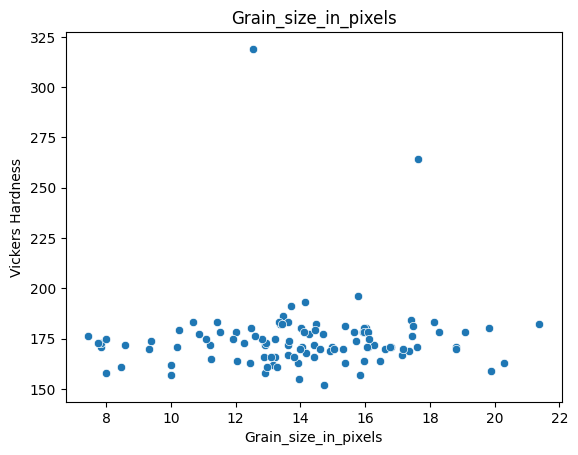

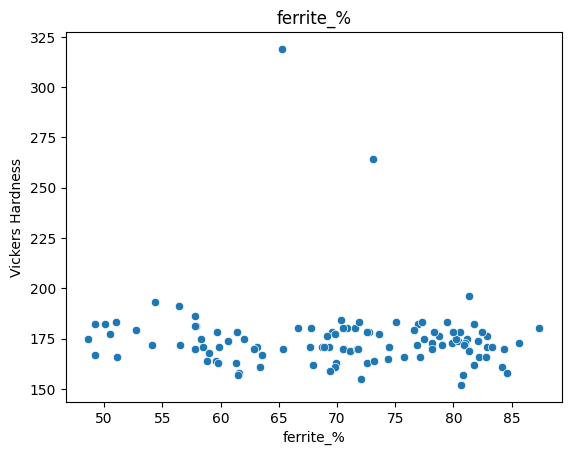

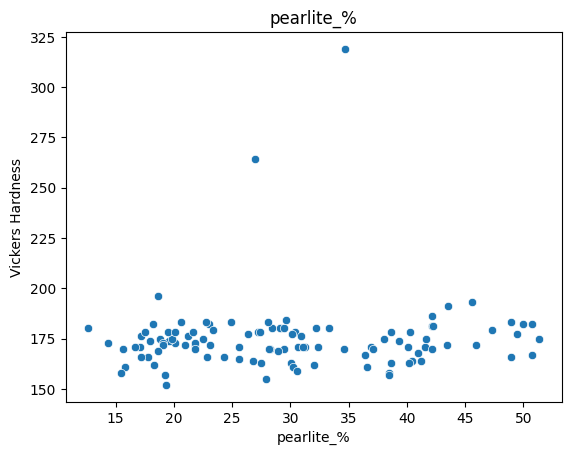

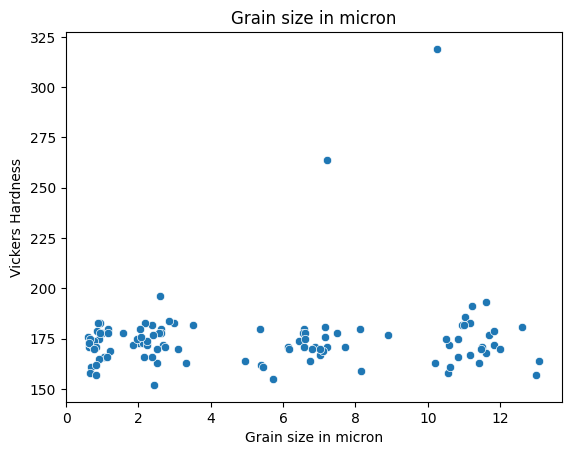

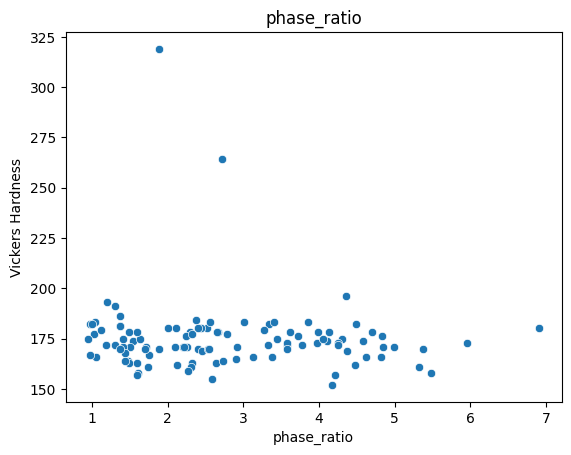

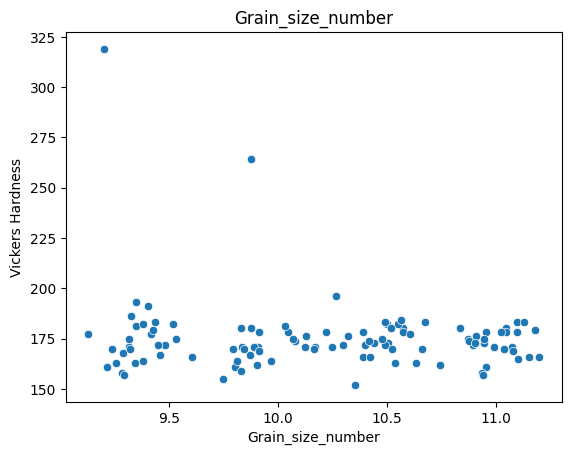

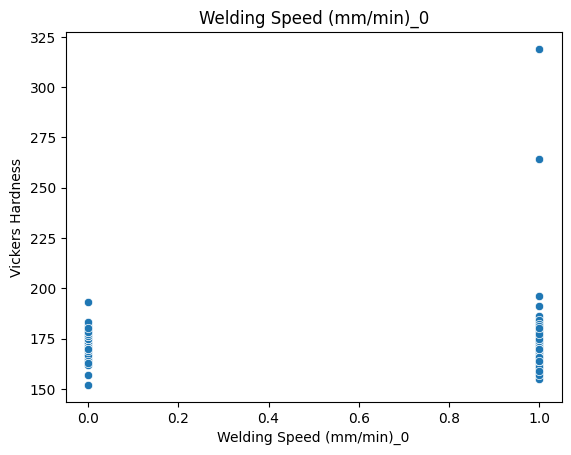

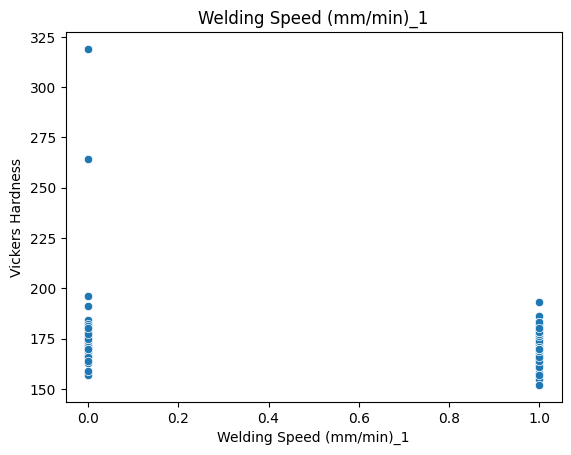

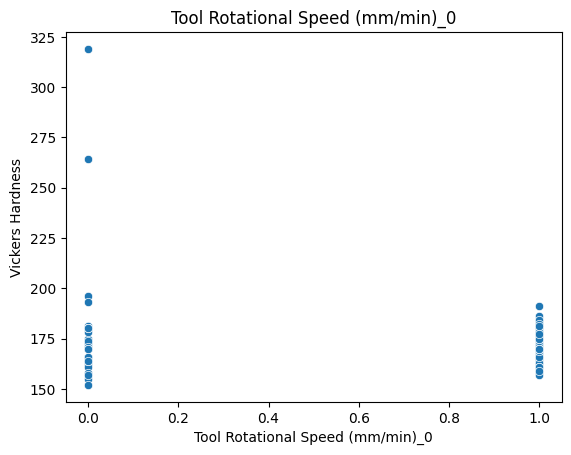

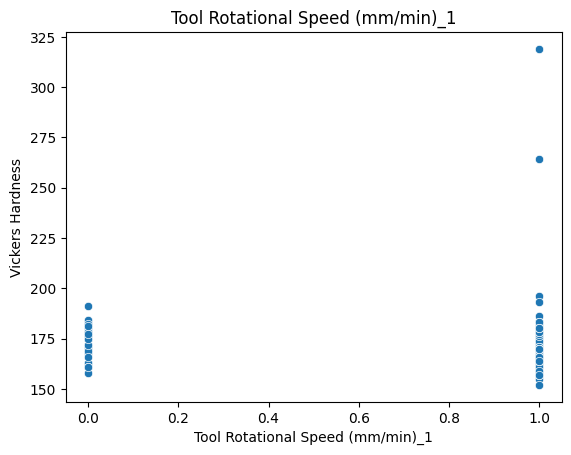

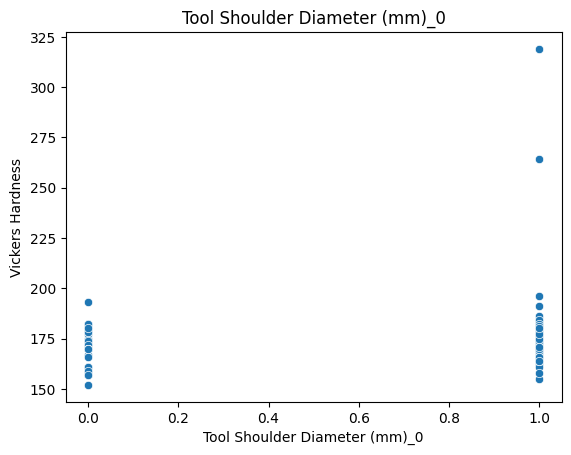

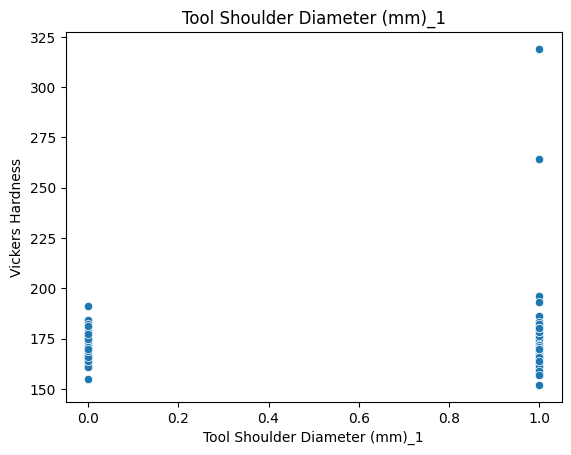

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data frame
df = data_encoded.copy()

# Get a list of all the columns except for the target column
columns = [col for col in df.columns if col != 'Vickers Hardness']

# Loop through each column and create a visualization
for column in columns:
    # If the column is categorical, create a box plot
    if df[column].dtype == 'object':
        sns.boxplot(x=column, y='Vickers Hardness', data=df)
    # If the column is numerical, create a scatter plot
    else:
        sns.scatterplot(x=column, y='Vickers Hardness', data=df)
    # Set the title of the plot
    plt.title(column)
    # Show the plot
    plt.show()


In [ ]:
data_encoded

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min)_0,Welding Speed (mm/min)_1,Tool Rotational Speed (mm/min)_0,Tool Rotational Speed (mm/min)_1,Tool Shoulder Diameter (mm)_0,Tool Shoulder Diameter (mm)_1,Vickers Hardness
0,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,0,1,0,1,0,1,171
1,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,0,1,0,1,0,1,181
2,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,0,1,0,1,0,1,180
3,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,0,1,0,1,0,1,173
4,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,1,0,1,0,1,0,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,1,0,1,1,0,1,170
104,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,0,1,0,1,0,1,170
105,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,0,1,0,1,0,1,157
106,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,0,1,0,1,0,1,170


In [ ]:
data_encoded.to_csv(r"/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data_encoded.csv", index=False)

In [ ]:
!tar -xzf "/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/tabular-lstm-644501d49e82a08eb256171a-data_preview.csv.gz"

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


In [ ]:
gzip -d /content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/tabular-lstm-644501d49e82a08eb256171a-data_preview.csv.gz

SyntaxError: ignored

In [ ]:
!gunzip "/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/tabular-lstm-644501d49e82a08eb256171a-data_preview.csv.gz"

In [ ]:
new_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/tabular-lstm-644501d49e82a08eb256171a-data_preview.csv")

<Axes: >

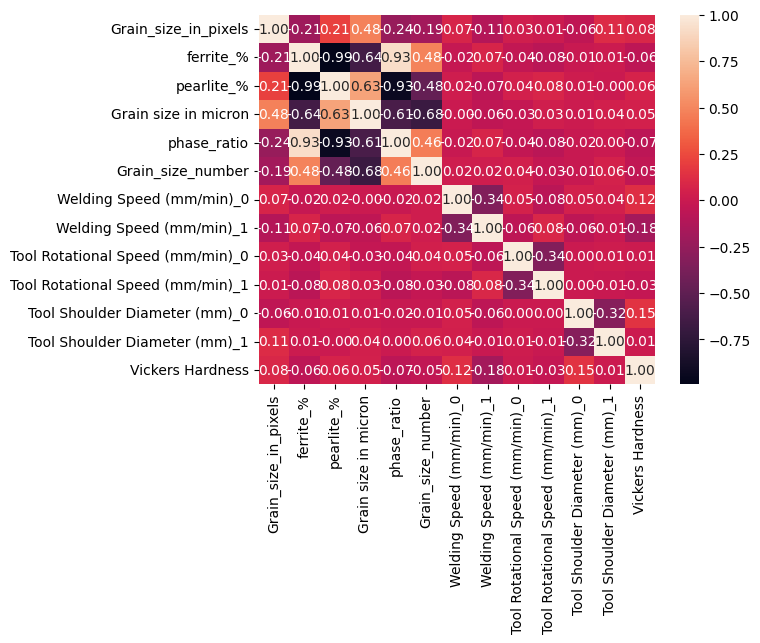

In [ ]:
sns.heatmap(new_data.corr(),annot=True,fmt='.2f')

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Reading in the data
df = new_data.copy()

# Separating features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Feature selection
k_best = SelectKBest(f_regression, k=5)
X = k_best.fit_transform(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing the regressors with regularization
lin_reg = Lasso(alpha=0.01, random_state=0)
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=3)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=10, max_depth=5)
nn_reg = MLPRegressor(random_state=0, max_iter=1000, alpha=0.01)

# Fitting the regressors on the training data
lin_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
nn_reg.fit(X_train, y_train)

# Predicting the target on the testing data
lin_y_pred = lin_reg.predict(X_test)
dt_y_pred = dt_reg.predict(X_test)
rf_y_pred = rf_reg.predict(X_test)
nn_y_pred = nn_reg.predict(X_test)

# Evaluating the models using r2_score
lin_r2 = r2_score(y_test, lin_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

# Printing the r2_score for each model
print('Linear Regression r2_score: ', lin_r2)
print('Decision Tree Regression r2_score: ', dt_r2)
print('Random Forest Regression r2_score: ', rf_r2)
print('Neural Network Regression r2_score: ', nn_r2)


Linear Regression r2_score:  0.05800907360030361
Decision Tree Regression r2_score:  0.04232889629640291
Random Forest Regression r2_score:  0.043855175677855684
Neural Network Regression r2_score:  0.05180539708844445


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data


# Split into features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to compare
models = [
    ('Neural Network', MLPRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name}: RMSE = {rmse:.2f}")


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: RMSE = 18.32
Random Forest: RMSE = 18.37
XGBoost: RMSE = 19.16


In [ ]:
data[:11]

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,164,710,15,171
1,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,164,710,15,181
2,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,164,710,15,180
3,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,164,710,15,173
4,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,104,560,18,176
5,13.704801,56.441243,43.558757,11.233443,1.295750,9.403352,104,560,18,191
6,18.279897,69.589799,30.410201,7.491761,2.288370,10.044810,104,560,18,178
7,14.469273,81.770607,18.229393,2.372012,4.485646,10.500836,104,560,18,182
8,12.025763,82.439055,17.560945,0.985718,4.694454,10.956309,208,560,15,178
9,12.917948,56.550429,43.449571,10.588482,1.301519,9.480173,208,560,15,172


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# load data
data=df.copy()
X = data.drop(columns=["Vickers Hardness"])
y = data["Vickers Hardness"]

# define the CatBoost model
model = CatBoostRegressor(loss_function="RMSE", silent=True)

# define the hyperparameters to search
params = {
    "iterations": [100, 200, 300],
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
}

# perform grid search cross validation to find the optimal parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, params, scoring="neg_root_mean_squared_error", cv=kf)
grid_search.fit(X, y)

# print the best parameters found by grid search
print("Best parameters:", grid_search.best_params_)

# use the best parameters to fit the model and calculate RMSE
best_model = CatBoostRegressor(**grid_search.best_params_, loss_function="RMSE", silent=True)
best_model.fit(X, y)
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
print("RMSE:", rmse)


Best parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.05}
RMSE: 17.03459057848764


In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load data from CSV file


# Separate the features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the SVM model
svm_model = SVR()

# Set up hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform grid search CV for SVM
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=kfold, scoring='neg_mean_squared_error')
svm_grid.fit(X, y)

# Print best parameters and RMSE score for SVM
print('SVM Best Params:', svm_grid.best_params_)
svm_rmse = np.sqrt(-svm_grid.best_score_)
print('SVM RMSE:', svm_rmse)

# Define the CatBoost model
catboost_model = CatBoostRegressor()

# Set up hyperparameter grid for CatBoost
catboost_param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'depth': [4, 6, 8]
}

# Perform grid search CV for CatBoost
catboost_grid = GridSearchCV(catboost_model, catboost_param_grid, cv=kfold, scoring='neg_mean_squared_error')
catboost_grid.fit(X, y)

# Print best parameters and RMSE score for CatBoost
print('CatBoost Best Params:', catboost_grid.best_params_)
catboost_rmse = np.sqrt(-catboost_grid.best_score_)
print('CatBoost RMSE:', catboost_rmse)

# Compare the two models
if svm_rmse < catboost_rmse:
    print('SVM has lower RMSE')
else:
    print('CatBoost has lower RMSE')


SVM Best Params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
SVM RMSE: 17.561469747952874


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-98-84fd8da83716>", line 54, in <cell line: 54>
    catboost_grid.fit(X, y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 851, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 367, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 135 fits failed.
It

In [ ]:
data

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,164,710,15,171
1,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,164,710,15,181
2,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,164,710,15,180
3,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,164,710,15,173
4,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...
103,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,104,450,15,170
104,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,164,710,15,170
105,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,164,710,15,157
106,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,164,710,15,170


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [ ]:
numeric_data

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,0.89,1.92,1.23,-0.19,0.68,1.04,2.21,2.85,1.18,2.23
1,1.19,1.76,1.62,1.10,0.14,0.97,2.21,2.85,1.18,2.26
2,1.20,1.85,1.45,0.82,0.40,0.99,2.21,2.85,1.18,2.26
3,1.09,1.90,1.30,0.30,0.60,1.02,2.21,2.85,1.18,2.24
4,0.87,1.92,1.23,-0.21,0.68,1.04,2.02,2.75,1.26,2.25
...,...,...,...,...,...,...,...,...,...,...
103,1.27,1.89,1.34,0.49,0.55,1.02,2.02,2.65,1.18,2.23
104,0.97,1.93,1.20,-0.12,0.73,1.04,2.21,2.85,1.18,2.23
105,1.20,1.79,1.59,1.11,0.20,0.97,2.21,2.85,1.18,2.20
106,1.23,1.86,1.45,0.85,0.41,0.99,2.21,2.85,1.18,2.23


In [ ]:
x=numeric_data.drop("Vickers Hardness",axis=1)
y=numeric_data['Vickers Hardness']

In [ ]:
# x=new_data.drop("Vickers Hardness",axis=1)[:2000]
# y=new_data['Vickers Hardness'][:2000]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# x=new_data.drop("Vickers Hardness",axis=1)[:2000]
# y=new_data['Vickers Hardness'][:2000]
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)


100%|██████████| 42/42 [00:02<00:00, 19.60it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RidgeCV                                     -0.63       0.07  0.06        0.01
Ridge                                       -0.63       0.07  0.06        0.01
TransformedTargetRegressor                  -0.64       0.06  0.06        0.01
LinearRegression                            -0.64       0.06  0.06        0.02
Lars                                        -0.64       0.06  0.06        0.01
PoissonRegressor                            -0.64       0.06  0.06        0.01
OrthogonalMatchingPursuit                   -0.65       0.06  0.06        0.01
OrthogonalMatchingPursuitCV                 -0.65       0.06  0.06        0.01
TweedieRegressor                            -0.67       0.05  0.06        0.01
GammaRegressor                              -0.67       0.05  0.06        0.02
BayesianRidge                               -0.69   

In [ ]:
new_data.columns

Index(['Grain_size_in_pixels', 'ferrite_%', 'pearlite_%',
       'Grain size in micron', 'phase_ratio', 'Grain_size_number',
       'Welding Speed (mm/min)_0', 'Welding Speed (mm/min)_1',
       'Tool Rotational Speed (mm/min)_0', 'Tool Rotational Speed (mm/min)_1',
       'Tool Shoulder Diameter (mm)_0', 'Tool Shoulder Diameter (mm)_1',
       'Vickers Hardness'],
      dtype='object')

In [ ]:
numeric_data['Grain_size_in_pixels'].fillna(numeric_data['Grain_size_in_pixels'].mean(),inplace=True)
numeric_data['Grain size in micron'].fillna(numeric_data['Grain size in micron'].mean(),inplace=True)
numeric_data.isna().sum()

Grain_size_in_pixels              0
ferrite_%                         0
pearlite_%                        0
Grain size in micron              0
phase_ratio                       0
Grain_size_number                 0
Welding Speed (mm/min)            0
Tool Rotational Speed (mm/min)    0
Tool Shoulder Diameter (mm)       0
Vickers Hardness                  0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your dataframe
df = numeric_data.drop("Vickers Hardness",axis=1)

# Choose the number of components you want to keep
n_components = 3

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(df)

# Transform the data to its principal components
principal_components = pca.transform(df)

# Create a new dataframe with the principal components
columns = ['PC{}'.format(i) for i in range(1, n_components+1)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Output the results
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components dataframe:\n", df_pca.head())


Explained variance ratio: [0.83464359 0.06292276 0.05378378]
Principal components dataframe:
     PC1   PC2   PC3
0  0.86  0.03 -0.08
1 -0.63 -0.04 -0.04
2 -0.23 -0.15  0.06
3  0.35 -0.11  0.04
4  0.87  0.18  0.05


In [ ]:
df_pca

,PC1,PC2,PC3
0,0.86,0.03,-0.08
1,-0.63,-0.04,-0.04
2,-0.23,-0.15,0.06
3,0.35,-0.11,0.04
4,0.87,0.18,0.05
...,...,...,...
103,0.14,-0.02,0.24
104,0.81,-0.04,-0.01
105,-0.60,-0.10,0.01
106,-0.25,-0.17,0.08


In [ ]:
x.shape,y.shape

((108, 3), (5000,))

In [ ]:
x=df_pca
y=numeric_data['Vickers Hardness']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)


100%|██████████| 42/42 [00:04<00:00,  8.56it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
QuantileRegressor                           -0.21      -0.04  0.02        0.50
DummyRegressor                              -0.39      -0.19  0.02        0.04
ElasticNet                                  -0.39      -0.19  0.02        0.04
LassoLars                                   -0.39      -0.19  0.02        0.03
Lasso                                       -0.39      -0.19  0.02        0.03
LassoLarsIC                                 -0.49      -0.27  0.02        0.04
RANSACRegressor                             -0.49      -0.28  0.02        0.17
HuberRegressor                              -0.52      -0.31  0.02        0.07
TweedieRegressor                            -0.53      -0.31  0.02        0.01
NuSVR                                       -0.53      -0.31  0.02        0.03
GammaRegressor                              -0.54   

import pandas as pd
from sklearn.decomposition import PCA

# Load your dataframe
df = data.drop("Vickers Hardness",axis=1)

# Choose the number of components you want to keep
n_components = 7

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(df)

# Transform the data to its principal components
principal_components = pca.transform(df)

# Create a new dataframe with the principal components
columns = ['PC{}'.format(i) for i in range(1, n_components+1)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Output the results
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components dataframe:\n", df_pca.head())

In [ ]:
data

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.83,82.88,17.12,0.64,4.84,10.99,164,710,15,171
1,15.37,57.87,42.13,12.60,1.37,9.35,164,710,15,181
2,16.03,71.53,28.47,6.57,2.51,9.88,164,710,15,180
3,12.27,79.90,20.10,2.01,3.98,10.50,164,710,15,173
4,7.45,82.86,17.14,0.61,4.83,10.91,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...
103,18.82,78.15,21.85,3.09,3.58,10.52,104,450,15,170
104,9.31,84.33,15.67,0.76,5.38,11.04,164,710,15,170
105,15.84,61.51,38.49,12.99,1.60,9.29,164,710,15,157
106,17.16,71.84,28.16,7.03,2.55,9.79,164,710,15,170


In [ ]:
x=df_pca
y=new_data['Vickers Hardness']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

ValueError: ignored

In [ ]:
data

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,7.83,82.88,17.12,0.64,4.84,10.99,164,710,15,171
1,15.37,57.87,42.13,12.60,1.37,9.35,164,710,15,181
2,16.03,71.53,28.47,6.57,2.51,9.88,164,710,15,180
3,12.27,79.90,20.10,2.01,3.98,10.50,164,710,15,173
4,7.45,82.86,17.14,0.61,4.83,10.91,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...
103,18.82,78.15,21.85,3.09,3.58,10.52,104,450,15,170
104,9.31,84.33,15.67,0.76,5.38,11.04,164,710,15,170
105,15.84,61.51,38.49,12.99,1.60,9.29,164,710,15,157
106,17.16,71.84,28.16,7.03,2.55,9.79,164,710,15,170


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your dataframe
df = data.drop("Vickers Hardness",axis=1)

# Choose the number of components you want to keep
n_components = 7

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(df)

# Transform the data to its principal components
principal_components = pca.transform(df)

# Create a new dataframe with the principal components
columns = ['PC{}'.format(i) for i in range(1, n_components+1)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Output the results
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components dataframe:\n", df_pca.head())

Explained variance ratio: [8.40461380e-01 1.42402727e-01 1.59925438e-02 5.73341747e-04
 3.11924212e-04 2.44794542e-04 1.11040401e-05]
Principal components dataframe:
      PC1   PC2    PC3   PC4   PC5   PC6   PC7
0 136.97 -7.84 -16.69 -4.89  2.52 -0.15  0.17
1 136.39 -6.27  21.09  0.64  2.90  1.77  0.05
2 136.70 -7.07   0.95  2.44  2.75  0.46 -0.36
3 136.90 -7.61 -11.94 -0.73  2.57 -0.51 -0.09
4 -13.20 51.52 -21.43 -5.81 -0.23  1.09  0.03


In [ ]:
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,136.97,-7.84,-16.69,-4.89,2.52,-0.15,0.17
1,136.39,-6.27,21.09,0.64,2.90,1.77,0.05
2,136.70,-7.07,0.95,2.44,2.75,0.46,-0.36
3,136.90,-7.61,-11.94,-0.73,2.57,-0.51,-0.09
4,-13.20,51.52,-21.43,-5.81,-0.23,1.09,0.03
...,...,...,...,...,...,...,...
103,-123.32,51.50,-15.28,4.98,2.91,0.24,0.11
104,137.00,-7.91,-18.59,-3.24,2.59,0.25,0.62
105,136.47,-6.47,16.25,1.69,3.06,3.27,-0.18
106,136.70,-7.07,0.72,3.65,2.81,0.84,-0.31


In [ ]:
x=df_pca
y=data['Vickers Hardness']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)


100%|██████████| 42/42 [00:01<00:00, 25.64it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
SVR                                         -0.49       0.00   7.53   
QuantileRegressor                           -0.52      -0.01   7.60   
RANSACRegressor                             -0.57      -0.05   7.73   
NuSVR                                       -0.58      -0.05   7.74   
HuberRegressor                              -0.64      -0.09   7.90   
LassoLarsCV                                 -0.87      -0.25   8.44   
DummyRegressor                              -0.87      -0.25   8.44   
LassoCV                                     -0.87      -0.25   8.44   
LarsCV                                      -0.87      -0.25   8.44   
KNeighborsRegressor                         -0.91      -0.27   8.51   
AdaBoostRegressor                           -0.98      -0.32   8.67   
PassiveAggressiveRegressor                  -1.03      -0.35   8.79   
Elasti

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,136.97,-7.84,-16.69,-4.89,2.52,-0.15,0.17
1,136.39,-6.27,21.09,0.64,2.90,1.77,0.05
2,136.70,-7.07,0.95,2.44,2.75,0.46,-0.36
3,136.90,-7.61,-11.94,-0.73,2.57,-0.51,-0.09
4,-13.20,51.52,-21.43,-5.81,-0.23,1.09,0.03
...,...,...,...,...,...,...,...
103,-123.32,51.50,-15.28,4.98,2.91,0.24,0.11
104,137.00,-7.91,-18.59,-3.24,2.59,0.25,0.62
105,136.47,-6.47,16.25,1.69,3.06,3.27,-0.18
106,136.70,-7.07,0.72,3.65,2.81,0.84,-0.31


In [ ]:
data_encoded

,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Welding Speed (mm/min)_0,Welding Speed (mm/min)_1,Tool Rotational Speed (mm/min)_0,Tool Rotational Speed (mm/min)_1,Tool Shoulder Diameter (mm)_0,Tool Shoulder Diameter (mm)_1,Vickers Hardness
0,7.83,82.88,17.12,0.64,4.84,10.99,0,1,0,1,0,1,171
1,15.37,57.87,42.13,12.60,1.37,9.35,0,1,0,1,0,1,181
2,16.03,71.53,28.47,6.57,2.51,9.88,0,1,0,1,0,1,180
3,12.27,79.90,20.10,2.01,3.98,10.50,0,1,0,1,0,1,173
4,7.45,82.86,17.14,0.61,4.83,10.91,1,0,1,0,1,0,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,18.82,78.15,21.85,3.09,3.58,10.52,1,0,1,1,0,1,170
104,9.31,84.33,15.67,0.76,5.38,11.04,0,1,0,1,0,1,170
105,15.84,61.51,38.49,12.99,1.60,9.29,0,1,0,1,0,1,157
106,17.16,71.84,28.16,7.03,2.55,9.79,0,1,0,1,0,1,170


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your dataframe
df = data_encoded.drop("Vickers Hardness",axis=1)

# Choose the number of components you want to keep
n_components = 7

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(df)

# Transform the data to its principal components
principal_components = pca.transform(df)

# Create a new dataframe with the principal components
columns = ['PC{}'.format(i) for i in range(1, n_components+1)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Output the results
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components dataframe:\n", df_pca.head())

Explained variance ratio: [9.44843672e-01 3.36669188e-02 1.51766932e-02 1.57056658e-03
 1.40692703e-03 1.25968348e-03 5.89963922e-04]
Principal components dataframe:
      PC1   PC2  PC3   PC4   PC5   PC6   PC7
0 -19.13 -4.94 0.52 -0.67 -0.87  0.14  0.30
1  18.69  0.41 2.80 -0.89 -0.74 -0.03  0.23
2  -1.45  2.30 1.44 -1.03 -0.70 -0.09 -0.15
3 -14.36 -0.79 0.31 -0.88 -0.79  0.01  0.08
4 -19.13 -5.30 0.42  1.14  0.72  0.11 -0.10


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# df = data

# Separate the target variable from the input features
X = df_pca
y = data_encoded['Vickers Hardness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Create a SVR model object
model = SVR()

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to fit the model to the training data
best_model = SVR(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])
best_model.fit(X_train, y_train)

# Use the best model to make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model performance on the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)


Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Mean squared error: 35.67599506203496
R-squared score: -0.13772034064867378


# From image to Hardness

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:",tf.__version__)
print("TF Hub version", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSSS!)" if tf.config.list_physical_devices("GPU") else "not available:")

TF version: 2.12.0
TF Hub version 0.13.0
GPU available (YESSSSS!)


In [ ]:
import os
from os import listdir
import pandas as pd
from os.path import isfile, join
onlyfiles = [f for f in listdir("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images") if isfile(join("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images", f))]
filenames=["/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images/"+f for f in onlyfiles]

In [ ]:
onlyfiles[0][:-3]+"jpg"

'Specimen 21 WM+WM1@500X.jpg'

In [ ]:
filenames=["/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images/"+f for f in onlyfiles]

In [ ]:
len(filenames)

108

In [ ]:
import os
from os import listdir
import pandas as pd
from os.path import isfile, join
onlyfiles = [f for f in listdir("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images") if isfile(join("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images", f))]
filenames=["/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images/"+f for f in onlyfiles]
filenames.sort()

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)

In [ ]:
df

,Unnamed: 0,image_name,Grain_size_in_pixels,ferrite_%,pearlite_%,Grain size in micron,phase_ratio,Grain_size_number,Run order,Welding Speed (mm/min),Tool Rotational Speed (mm/min),Tool Shoulder Diameter (mm),Vickers Hardness
0,0,Specimen 1 WM+WM1@1000X.bmp,7.831706,82.878282,17.121718,0.641943,4.840536,10.993419,1,164,710,15,171
1,1,Specimen 1 WM+WM1@100X.bmp,15.366231,57.873987,42.126013,12.595271,1.373830,9.349474,1,164,710,15,181
2,2,Specimen 1 WM+WM1@200X.bmp,16.026924,71.533655,28.466345,6.568412,2.512920,9.876180,1,164,710,15,180
3,3,Specimen 1 WM+WM1@500X.bmp,12.267372,79.904514,20.095486,2.011045,3.976242,10.503558,1,164,710,15,173
4,4,Specimen 1 WM+WM2@1000X.bmp,7.445130,82.860198,17.139802,0.610257,4.834373,10.907925,2,104,560,18,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,Specimen 9 WM+WM2@500X.bmp,18.820513,78.154161,21.845839,3.085330,3.577531,10.522442,26,104,450,15,170
104,104,Specimen 9 WM+WM3@1000X.bmp,9.313809,84.329337,15.670663,0.763427,5.381351,11.039220,27,164,710,15,170
105,105,Specimen 9 WM+WM3@100X.bmp,15.841966,61.514847,38.485153,12.985218,1.598405,9.294229,27,164,710,15,157
106,106,Specimen 9 WM+WM3@200X.bmp,17.158359,71.841770,28.158230,7.032114,2.551360,9.793939,27,164,710,15,170


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)
sorted_df = df.sort_values(by=['image_name'], ascending=True)
onlyfiles.sort()
check=sorted_df['image_name']==onlyfiles
x=filenames
y=sorted_df['Vickers Hardness']
df=pd.DataFrame(list(zip(x, y)), columns=['filenames','Vickers Hardness'])

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from sklearn.metrics import r2_score

# Load the data
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)

sorted_df = df.sort_values(by=['image_name'], ascending=True)
onlyfiles.sort()
check=sorted_df['image_name']==onlyfiles
x=filenames
y=sorted_df['Vickers Hardness']
df=pd.DataFrame(list(zip(x, y)), columns=['filename','target'])
test_df=df[-25:]

# Define the data generators for training and validation
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=".",
    x_col="filename",
    y_col="target",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    subset="training"
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=".",
    x_col="filename",
    y_col="target",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    subset="validation"
)

# Define the base model architecture
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Add a pooling layer and a dense output layer
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1)(x)

# Build the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    loss='mse',
    optimizer=optimizers.Adam(lr=0.01),
    metrics=['mse', 'rmse', tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
    ]
)

# Evaluate the model
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=".",
    x_col="filename",
    y_col="target",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

y_true = test_generator.labels
y_pred = np.mean([model.predict(test_generator) for _ in range(5)], axis=0)
r2 = r2_score(y_true, y_pred)
print(f"R2 score: {r2}")


Found 87 validated image filenames.
Found 21 validated image filenames.


Epoch 1/100


ValueError: ignored

##We got 0.38 r2 at 512,512,16,50

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os import listdir
import pandas as pd
from os.path import isfile, join
onlyfiles = [f for f in listdir("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images") if isfile(join("/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images", f))]
filenames=["/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images/"+f for f in onlyfiles]
filenames.sort()
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)
sorted_df = df.sort_values(by=['image_name'], ascending=True)
onlyfiles.sort()
check=sorted_df['image_name']==onlyfiles
x=filenames
y=sorted_df['Vickers Hardness']
df=pd.DataFrame(list(zip(x, y)), columns=['filenames','Vickers Hardness'])
df['Vickers Hardness']=df['Vickers Hardness']*10

# Define image dimensions and other hyperparameters
img_height = 512
img_width = 512
batch_size = 16
num_epochs = 250
learning_rate = 0.001

# Define the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom output layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='linear')(x)

# Define the model with pre-trained layers and custom output layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mae')

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True)

# Split the dataframe into training and validation sets
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)

# Load the training and validation datasets using the data generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filenames',
    y_col='Vickers Hardness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

val_generator = train_datagen.flow_from_dataframe(
    val_df,
    x_col='filenames',
    y_col='Vickers Hardness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

# Fit the model on the training set and evaluate on the validation set
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

# Save the model weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/latest.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/latest.h5')

# Load the new data
# Create a new data generator for the new data
new_datagen = ImageDataGenerator(rescale=1./255)
y_true=df['Vickers Hardness']
df.drop('Vickers Hardness',axis=1,inplace=True)
new_generator = new_datagen.flow_from_dataframe(
    df,
    x_col='filenames',
    y_col=None,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Make predictions on the new data
predictions = model.predict(new_generator)

# Print the predicted values
# print(predictions)
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE: ",mean_squared_error(y_true,predictions,squared=False))
print("R2 Score: ",r2_score(y_true,predictions))

58889256/58889256 [==============================] - 0s 0us/step
Found 86 validated image filenames.
Found 22 validated image filenames.
Epoch 1/250
6/6 [==============================] - 367s 61s/step - loss: 1477.3408 - val_loss: 1166.2688
Epoch 2/250
6/6 [==============================] - 364s 61s/step - loss: 799.7275 - val_loss: 424.6219
Epoch 3/250
6/6 [==============================] - ETA: 0s - loss: 240.8153 

## For 0.51 r2 score and 127 rmse we used ...
img_height = 512
img_width = 512
batch_size = 16
num_epochs = 100
learning_rate = 0.01

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/r2 0.51 and rmse 127.h5')

# Load the new data
# Create a new data generator for the new data
new_datagen = ImageDataGenerator(rescale=1./255)
y_true=df['Vickers Hardness']
df.drop('Vickers Hardness',axis=1,inplace=True)
new_generator = new_datagen.flow_from_dataframe(
    df,
    x_col='filenames',
    y_col=None,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Make predictions on the new data
predictions = model.predict(new_generator)

# Print the predicted values
# print(predictions)

KeyError: ignored

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE: ",mean_squared_error(y_true,predictions,squared=False))
print("R2 Score: ",r2_score(y_true,predictions))

RMSE:  19.41992381626412
R2 Score:  -0.12493455342150406


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataframe with image filenames and target column
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)
sorted_df = df.sort_values(by=['image_name'], ascending=True)
onlyfiles.sort()
check=sorted_df['image_name']==onlyfiles
x=filenames
y=sorted_df['Vickers Hardness']
df=pd.DataFrame(list(zip(x, y)), columns=['filename','target'])

# Define image dimensions and other hyperparameters
img_height = 224
img_width = 224
batch_size = 32
num_epochs = 100
learning_rate = 0.001

# Define the pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom output layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='linear')(x)

# Define the model with pre-trained layers and custom output layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mae')

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Split the dataframe into training and validation sets
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)

# Load the training and validation datasets using the data generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

val_generator = train_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

# Fit the model on the training set and evaluate on the validation set
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

# Save the model weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/latest.h5')

# Load the saved model weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/latest.h5')

# Load the new data
new_df = df.copy()

# Create a new data generator for the new data
new_datagen = ImageDataGenerator(rescale=1./255)

new_generator = new_datagen.flow_from_dataframe(
    new_df,
    x_col='filename',
    y_col=None,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Make predictions on the new data
y_true=df['target']
predictions = model.predict(new_generator)

# Print the predicted values
# print(predictions)
print(mean_squared_error(y_true,predictions,squared=False))
print(r2_score(y_true,predictions))

Found 86 validated image filenames.
Found 22 validated image filenames.
Epoch 1/100
3/3 [==============================] - 11s 2s/step - loss: 30343.8086 - val_loss: 31146.5176
Epoch 2/100
3/3 [==============================] - 2s 585ms/step - loss: 30049.5059 - val_loss: 30919.0020
Epoch 3/100
3/3 [==============================] - 2s 653ms/step - loss: 29776.9277 - val_loss: 30526.7168
Epoch 4/100
3/3 [==============================] - 2s 705ms/step - loss: 29560.3828 - val_loss: 30365.8457
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 29182.0020 - val_loss: 29982.4824
Epoch 6/100
3/3 [==============================] - 3s 919ms/step - loss: 28899.9355 - val_loss: 29647.0879
Epoch 7/100
3/3 [==============================] - 2s 581ms/step - loss: 28661.2500 - val_loss: 29561.6133
Epoch 8/100
3/3 [==============================] - 2s 572ms/step - loss: 28401.7969 - val_loss: 29217.4883
Epoch 9/100
3/3 [==============================] - 2s 579ms/step - loss: 2812

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Define the path to the image directory
img_dir = "/content/drive/MyDrive/Colab Notebooks/M tech thesis/all_images"
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
df=pd.concat([data,parameters],axis=1)
sorted_df = df.sort_values(by=['image_name'], ascending=True)
onlyfiles.sort()
check=sorted_df['image_name']==onlyfiles
x=filenames
y=sorted_df['Vickers Hardness']
df=pd.DataFrame(list(zip(x, y)), columns=['filename','target'])
# Define the target labels for each image
targets = list(df['target'])

# Create an empty list to store the image data
img_data = []

# Loop over the images in the directory
for filename in os.listdir(img_dir):
    # Open the image using Pillow
    img = Image.open(os.path.join(img_dir, filename))
    # Resize the image to a common size
    img = img.resize((224, 224))
    # Convert the image to a NumPy array
    img_arr = np.array(img)
    # Add the image array and the target label to the list
    img_data.append((img_arr, targets.pop(0)))

# Create a Pandas dataframe from the image data
image_df = pd.DataFrame(img_data, columns=["image", "target"])

# Save the dataframe to a CSV file
image_df.to_csv("image_data.csv", index=False)


In [ ]:
image_df.loc[0].image.shape

(224, 224, 3)

In [ ]:

# data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/data.csv")
# parameters=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/M tech thesis/ML-in-Friction-Stir-Welding/parameters.xlsx")
# df=pd.concat([data,parameters],axis=1)
# # df=new_data.copy()
# sorted_df = df.sort_values(by=['image_name'], ascending=True)
# onlyfiles.sort()
# check=sorted_df['image_name']==onlyfiles
# x=filenames
# y=sorted_df['Vickers Hardness']
# df=pd.DataFrame(list(zip(x, y)), columns=['filenames','Vickers Hardness'])
df=
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and other hyperparameters
img_height = 512
img_width = 512
batch_size = 32
num_epochs = 50
learning_rate = 0.01

# Define the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom output layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='linear')(x)

# Define the model with pre-trained layers and custom output layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Split the dataframe into training and validation sets
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)

# Load the training and validation datasets using the data generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filenames',
    y_col='Vickers Hardness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

val_generator = train_datagen.flow_from_dataframe(
    val_df,
    x_col='filenames',
    y_col='Vickers Hardness',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

# Fit the model on the training set and evaluate on the validation set
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

# Save the model weights
model.save_weights('model.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/M tech thesis/model.h5')

# Load the new data
# Create a new data generator for the new data
new_datagen = ImageDataGenerator(rescale=1./255)
y_true=df['Vickers Hardness']
df.drop('Vickers Hardness',axis=1,inplace=True)
new_generator = new_datagen.flow_from_dataframe(
    df,
    x_col='filenames',
    y_col=None,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Make predictions on the new data
predictions = model.predict(new_generator)

# Print the predicted values
# print(predictions)
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE: ",mean_squared_error(y_true,predictions,squared=False))
print("R2 Score: ",r2_score(y_true,predictions))